# Análise de dados de blitz policiais com pandas
---

# Escopo da apresentação
---


## 1. Introdução ao conjunto de dados
## 2. Exploração inicial
## 3. Limpeza dos dados
## 4. Investigação e perguntas!
## 5. Enriquecendo a base de dados...
---

# 1. Dados policiais públicos de Stanford

Paradas de blitz policiais

<iframe
  src="https://openpolicing.stanford.edu/"
  style="width:100%; height:300px;"
></iframe>

Download de dados de outros estados:

https://openpolicing.stanford.edu/

# 2. Exploração inicial

In [1]:
# Importando os pacotes
import pandas as pd # Análise e transformação de dados
import matplotlib.pyplot as plt # Visualização de dados
import seaborn as sns # Visualização de dados
import numpy as np # Computação numérica

In [2]:
%load_ext watermark
%watermark --iversions

seaborn   : 0.11.1
pandas    : 1.2.4
numpy     : 1.20.3
matplotlib: 3.4.2
sys       : 3.8.10 (default, Jun  2 2021, 10:49:15) 
[GCC 9.4.0]



In [3]:
## Documentação pd.read_csv: 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

## Documentação pd.DataFrame:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

# Importando os dados da cidade de Oklahoma
okl = pd.read_csv("oklahoma_police.csv")

okl.head()

,raw_row_number,date,time,location,lat,lng,beat,division,sector,subject_age,...,citation_issued,outcome,speed,posted_speed,vehicle_color,vehicle_make,vehicle_model,vehicle_registration_state,vehicle_year,raw_dfnd_race
0,34558|34559|34560,2011-01-01,01:00:00,3100 S CLERGEN,35.434246,-97.531379,D3,Santa Fe,SF1,28.0,...,True,citation,NaN,NaN,BLK,DODG,NaN,OK,2001.0,W
1,34573,2011-01-01,12:00:00,1430 NW 96,35.568290,-97.539368,C10,Springlake,SL3,25.0,...,True,citation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
2,34575,2011-01-01,15:00:00,NW 63/LAKEHEFNERPRKWY,35.595250,-97.584126,B3,Hefner,HF1,26.0,...,True,citation,NaN,NaN,RED,MERB,NaN,OK,1993.0,B
3,34564,2011-01-01,15:15:00,100 E I240 SERV RD,35.388966,-97.511032,D9,Santa Fe,SF3,25.0,...,True,citation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W
4,34563,2011-01-01,15:15:00,100 E I240 SRV RD,35.388966,-97.511032,D9,Santa Fe,SF3,53.0,...,True,citation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W


In [4]:
# Cada registro corresponde à uma parada policial
okl.shape

(726433, 25)

In [5]:
# E cada coluna corresponde à uma característica da parada.
# Temos diferente característica para diferentes cidades no projeto
okl.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'beat',
       'division', 'sector', 'subject_age', 'subject_race', 'subject_sex',
       'officer_id_hash', 'type', 'violation', 'citation_issued', 'outcome',
       'speed', 'posted_speed', 'vehicle_color', 'vehicle_make',
       'vehicle_model', 'vehicle_registration_state', 'vehicle_year',
       'raw_dfnd_race'],
      dtype='object')

# 3. Limpeza dos dados

In [6]:
## Documentação pd.drop:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

# Removendo coluna desnecessária
okl.drop("raw_row_number", axis="columns", inplace=True)

In [7]:
# Curiosidade: blitz policiais afetam pedestres também nos Estados Unidos, pelo menos em Oklahoma...
okl.type.unique()

array([nan, 'vehicular', 'pedestrian'], dtype=object)

In [8]:
# Localizando valores ausentes ou nulos (missing)
okl.isna()

,date,time,location,lat,lng,beat,division,sector,subject_age,subject_race,...,citation_issued,outcome,speed,posted_speed,vehicle_color,vehicle_make,vehicle_model,vehicle_registration_state,vehicle_year,raw_dfnd_race
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726428,False,False,True,True,True,True,True,True,False,False,...,False,False,True,True,True,True,True,True,True,False
726429,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,False
726430,False,False,True,True,True,True,True,True,False,False,...,False,False,True,True,True,True,True,True,True,False
726431,False,False,True,True,True,True,True,True,False,False,...,False,False,True,True,True,True,True,True,True,False


In [9]:
# Quantidade de valores ausentes por coluna (True = 1, False = 0)
okl.isnull().sum().sort_values(ascending=False) / len(okl) * 100
# Colocar os valores em percentual e ordená-los

posted_speed                  59.237672
speed                         59.233267
vehicle_model                 53.783212
vehicle_year                  22.261516
type                          21.021347
vehicle_registration_state    17.314880
beat                          15.022170
division                      15.022170
sector                        15.022170
vehicle_make                  13.784065
vehicle_color                 13.694587
lat                           10.058739
lng                           10.058739
subject_age                    0.445327
subject_sex                    0.275043
raw_dfnd_race                  0.245171
subject_race                   0.245171
location                       0.019685
violation                      0.000275
outcome                        0.000000
citation_issued                0.000000
time                           0.000000
officer_id_hash                0.000000
date                           0.000000
dtype: float64

In [10]:
# Temos algumas características cuja quantidade de valores missing chega a ser 60 % da coluna!!!
okl.shape

(726433, 24)

In [11]:
## Documentação método pd.dropna: 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

# Limpando a nossa base já!

# Removendo colunas com mais de 10 % de valores missing
na_series = okl.isnull().sum().sort_values(ascending=False) / len(okl) * 100

cols_to_drop = na_series[na_series > 10].index

okl.drop(cols_to_drop, axis="columns", inplace=True)

# Removendo registros com valores nulos
registry_to_drop = na_series[(0 < na_series) & (na_series < 10)].index

okl.dropna(subset=registry_to_drop, axis="index", inplace=True)

okl.shape

(720502, 11)

In [12]:
# Checando os tipos de dados

# `object` -> strings do Python
# `bool` -> variáveis booleanas (True ou False)
# Outros tipos -> int, float, category, datetime
okl.dtypes

date                object
time                object
location            object
subject_age        float64
subject_race        object
subject_sex         object
officer_id_hash     object
violation           object
citation_issued       bool
outcome             object
raw_dfnd_race       object
dtype: object

In [13]:
## Dodumentação pd.to_datetime:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

# Corrigindo o tipo de dado das colunas de data e hora

# Unindo as 2 colunas em uma única, separadas por um espaço em branco
okl["date_and_time"] = okl["date"] + " " + okl["time"]

# Sobrescevendo a nova coluna com o tipo de dado correto
okl["date_and_time"] = pd.to_datetime(okl["date_and_time"])

# Removendo as 2 colunas inicias
okl.drop(["date", "time"], axis="columns", inplace=True)

# Checando os tipos novamente
okl.dtypes

location                   object
subject_age               float64
subject_race               object
subject_sex                object
officer_id_hash            object
violation                  object
citation_issued              bool
outcome                    object
raw_dfnd_race              object
date_and_time      datetime64[ns]
dtype: object

# 4. Investigação! Começando a fazer perguntas sobre o nosso conjunto de dados... aqui a curiosidade fala mais alto!

## 4.1 Será que homens e mulheres cometem violações diferentes?

In [14]:
# Tipo de violações no conjunto de dados
okl["violation"].value_counts()

SPEEDING 1-10 MPH OVER SPEED LIMIT                                                                                    323291
SEAT BELT VIOLATION                                                                                                    34641
SPEEDING 15-19 MPH OVER SPEED LIMIT                                                                                    24873
FAILURE TO STOP FOR STOP SIGN                                                                                          22550
ILLEGAL TAG DISPLAY                                                                                                    15870
                                                                                                                       ...  
PUBLIC DRUNKENNESS|NCRCRA - GLASS BOTTLE VIOLATION|DISORDERLY CONDUCT                                                      1
SEAT BELT VIOLATION|FAILURE TO SHOW PROOF OF INSURANCE|NO STATE DRIVER LICENSE IN POSSESSION|ILLEGAL TAG DISPLAY           1


In [15]:
# Separando os conjuntos de dados entre os gêneros

# Primeira forma de selecionar registros
man = okl[okl["subject_sex"] == "male"]

# Segunda forma de selecionar registros (existem outras...)
woman = okl.query("subject_sex == 'female'")

In [16]:
man.violation.value_counts(normalize=True) * 100

SPEEDING 1-10 MPH OVER SPEED LIMIT                                                                                                                   40.902531
SEAT BELT VIOLATION                                                                                                                                   5.513046
SPEEDING 15-19 MPH OVER SPEED LIMIT                                                                                                                   3.437046
FAILURE TO STOP FOR STOP SIGN                                                                                                                         2.958214
ASSAULT AND BATTERY                                                                                                                                   2.432567
                                                                                                                                                       ...    
DRIVING UNDER THE INFLUENCE OF ALCOHOL|SPEEDIN

In [17]:
woman.violation.value_counts(normalize=True) * 100

SPEEDING 1-10 MPH OVER SPEED LIMIT                                                                                                                  51.095114
SEAT BELT VIOLATION                                                                                                                                  3.701604
SPEEDING 15-19 MPH OVER SPEED LIMIT                                                                                                                  3.475914
FAILURE TO STOP FOR STOP SIGN                                                                                                                        3.398901
LARCENY OF MERCHANDISE                                                                                                                               2.548195
                                                                                                                                                      ...    
NO STATE DRIVER LICENSE/IMPROPER USE OR|FAILURE TO S

## 4.2 Como são distribuídas as paradas policiais ao longo do dia?

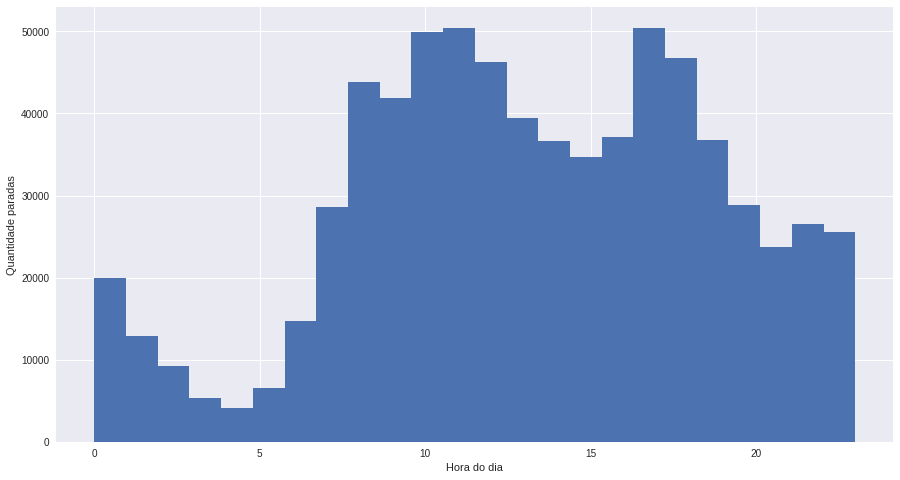

In [18]:
# Configurando um estilo para o gráfico
plt.style.use("seaborn")

# Histograma da distribuição do horário das paradas policiais
okl.date_and_time.dt.hour.hist(bins=24, figsize=(15,8))
plt.xlabel("Hora do dia")
plt.ylabel("Quantidade paradas")
plt.show()

In [19]:
okl.date_and_time.dt.hour.value_counts()

11    50458
17    50443
10    49972
18    46718
12    46326
8     43782
9     41868
13    39416
16    37148
19    36800
14    36635
15    34746
20    28909
7     28642
22    26520
23    25608
21    23707
0     20002
6     14742
1     12852
2      9180
5      6590
3      5291
4      4147
Name: date_and_time, dtype: int64

## 4.3 Qual gênero foi mais abordado nas blitz? São homens mais velhos ou mais novos? E as mulheres, são mais velhas ou mais novas?

In [20]:
okl.subject_sex.value_counts()

male      440029
female    280473
Name: subject_sex, dtype: int64

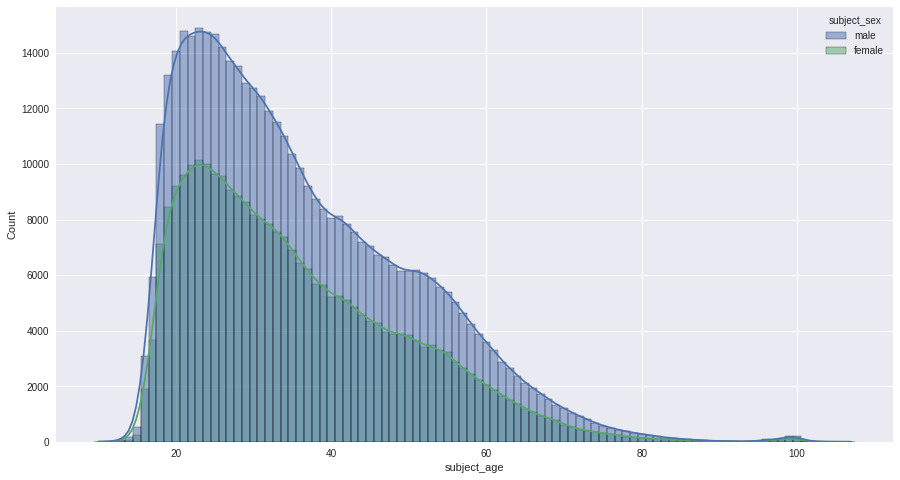

In [21]:
plt.figure(figsize=(15,8))
sns.histplot(x="subject_age", data=okl, discrete=True, kde=True, hue="subject_sex")
plt.show()

## 4.4 Qual o gênero mais abordado pelo policial que fez mais abordagens?

In [22]:
# Calculando o número de policiais distintos que fizeram blits
# Cada policial, por questões de privacidade, foi identificado com um id
okl.officer_id_hash

0         bcb82f25e8
1         242e478482
2         ec4125b8d5
3         f9a91f8e6a
4         f9a91f8e6a
             ...    
726422    e386f0ba3a
726423    8add4f94ea
726424    9528ed8e02
726426    a23d52180a
726429    2822bdd4ec
Name: officer_id_hash, Length: 720502, dtype: object

In [23]:
# Número distindo de policiais
okl.officer_id_hash.nunique()

1737

In [24]:
# Quantas paradas cada policial fez?
most_freq_police_id = okl.officer_id_hash.value_counts().head(1).index

In [25]:
# Há alguma tendência nas paradas deles com relação ao gênero?
most_freq_id_stops = okl[okl.officer_id_hash.isin(most_freq_police_id)]

most_freq_id_stops.groupby(["officer_id_hash", "subject_sex"]).count()["location"]

officer_id_hash  subject_sex
c250533f7a       female          7038
                 male           11743
Name: location, dtype: int64

# 5. Enriquecendo a base de dados com dados climatológicos de Oklahoma

## Carga inicial de dados

http://www.mesonet.org/index.php/weather/daily_data_retrieval

https://en.wikipedia.org/wiki/Oklahoma_Mesonet

O Oklahoma Mesonet é uma rede de estações de monitoramento ambiental projetadas para coletar informações meteorológicas. Desenvolvido pela Universidade de Oklahoma, é possível solicitar os dados informando:
- Estação (instrumento de medição). Para nossa análise, solicitei os dados do OKCE (Oklahoma East)
- Período. Utilizei o mesmo período do nosso dataset da polícia (coluna `date_and_time`)
- Variáveis. Selecionei todas, para trazer o máximo possível de informações.

Escolhendo todas as opções, é só passar o e-mail que você receberá os dados.


<iframe
  src="http://www.mesonet.org/index.php/weather/daily_data_retrieval"
  style="width:100%; height:300px;"
></iframe>

In [26]:
# Carregando os dados climatológicos
weather = pd.read_csv("weather.csv")

weather.head()

# Dicionário de dados no site MesoNet

,YEAR,MONTH,DAY,STID,TMAX,TMIN,TAVG,DMAX,DMIN,DAVG,...,S60NO,S60BD,TR05,R05BD,TR25,R25BD,TR60,R60BD,TR75,R75BD
0,2011,1,1,OKCE,35.21,16.02,24.85,13.11,2.95,5.36,...,-999.0,-999.0,3.2175,0,3.8503,0,3.8642,0,-999.0,-999.0
1,2011,1,2,OKCE,43.93,11.62,28.35,17.88,7.29,11.77,...,-999.0,-999.0,-996.0000,5,3.8577,0,3.8690,0,-999.0,-999.0
2,2011,1,3,OKCE,57.79,30.05,40.96,29.65,16.24,21.56,...,-999.0,-999.0,3.2648,0,3.8606,0,3.8700,0,-999.0,-999.0
3,2011,1,4,OKCE,48.56,26.05,36.18,25.23,19.33,21.55,...,-999.0,-999.0,3.3026,0,3.8601,0,3.8723,0,-999.0,-999.0
4,2011,1,5,OKCE,52.03,20.87,37.02,27.04,18.61,22.30,...,-999.0,-999.0,3.3476,0,3.8560,0,3.8714,0,-999.0,-999.0


## Preparando dados relacionados à velocidade do vento

In [27]:
# WSPD -> Velocidade média do vento [mph]
# 2MAX -> Velocidade máxima do vento [mph] em intervalos de 2 minutos ao longo do dia

wind_cols = ["WSPD", "2MAX"]

# Veficando a integridade do novo conjunto de dados, temos alguns valores estranhos...
weather[wind_cols].describe()

,WSPD,2MAX
count,2482.000000,2482.000000
mean,-4.561253,0.464996
std,105.954658,106.523028
min,-996.000000,-996.000000
25%,4.820000,9.060000
50%,6.410000,11.360000
75%,8.357500,13.910000
max,17.480000,34.470000


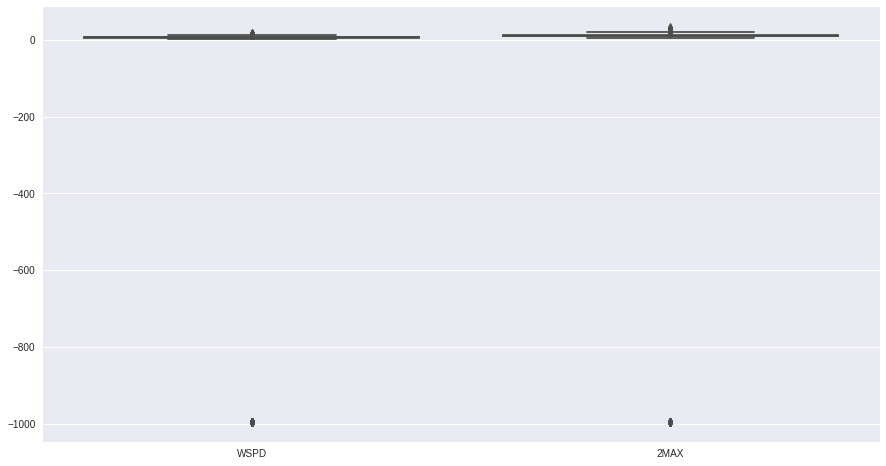

In [28]:
# Inspeção visual para confirmar o fato estranho encontrado acima...
plt.figure(figsize=(15,8))
sns.boxplot(data=weather[wind_cols])
plt.show()

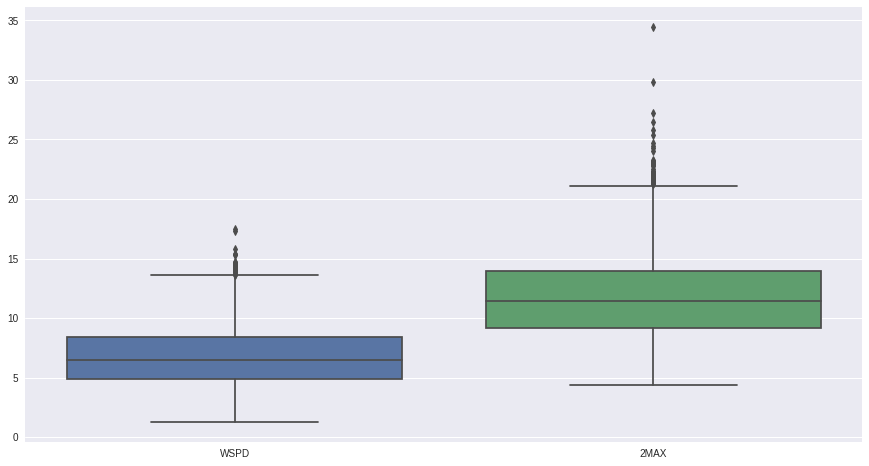

In [29]:
# Removendo os valores outliers estranhos
weather = weather[(weather["WSPD"] > 0) & (weather["2MAX"] > 0)]

plt.figure(figsize=(15,8))
sns.boxplot(data=weather[wind_cols])
plt.show()

In [30]:
# Categorizando a velocidade do vento
# Escala de Beaufort: https://en.wikipedia.org/wiki/Beaufort_scale

wind_cats = [
    "Calm", # Ventos calmo
    "Light air", # Vento leve
    "Light breeze", # Brisa leve
    "Gentle breeze", # Brisa suave
    "Moderate breeze", # Brisa moderada
    "Fresh breeze", # ?
    "Strong breeze", # Brisa forte
    "High wind", # Vendaval
    "Gale,fresh", # Vendaval moderado
    "Strong/severe", # Vendaval severo
    "Storm,whole", # Vendaval extremo
    "Violent storm", # Tempestade
    "Hurricane force", # Alerta de furacão
]

weather["WIND_CAT"] = None

weather["WIND_CAT"] = np.where(weather["WSPD"] < 1, "Calm", weather["WIND_CAT"])
weather["WIND_CAT"] = np.where(weather["WSPD"].between(1,4, inclusive="left"), "Light air", weather["WIND_CAT"])
weather["WIND_CAT"] = np.where(weather["WSPD"].between(4,7, inclusive="left"), "Light breeze", weather["WIND_CAT"])
weather["WIND_CAT"] = np.where(weather["WSPD"].between(7,12, inclusive="left"), "Gentle breeze", weather["WIND_CAT"])
weather["WIND_CAT"] = np.where(weather["WSPD"].between(12,18, inclusive="left"), "Moderate breeze", weather["WIND_CAT"])
weather["WIND_CAT"] = np.where(weather["WSPD"].between(18,24, inclusive="left"), "Fresh breeze", weather["WIND_CAT"])
weather["WIND_CAT"] = np.where(weather["WSPD"].between(24,31, inclusive="left"), "Strong breeze", weather["WIND_CAT"])
weather["WIND_CAT"] = np.where(weather["WSPD"].between(31,38, inclusive="left"), "High wind,moderate gale,near gale", weather["WIND_CAT"])
weather["WIND_CAT"] = np.where(weather["WSPD"].between(38,46, inclusive="left"), "Gale,fresh gale", weather["WIND_CAT"])
weather["WIND_CAT"] = np.where(weather["WSPD"].between(46,54, inclusive="left"), "Strong/severe gale", weather["WIND_CAT"])
weather["WIND_CAT"] = np.where(weather["WSPD"].between(54,63, inclusive="left"), "Storm,whole gale", weather["WIND_CAT"])
weather["WIND_CAT"] = np.where(weather["WSPD"].between(63,73, inclusive="left"), "Violent storm", weather["WIND_CAT"])
weather["WIND_CAT"] = np.where(weather["WSPD"] >= 73, "Hurricane force", weather["WIND_CAT"])


weather["WIND_CAT"] = weather["WIND_CAT"].astype(pd.CategoricalDtype(ordered=True, categories = wind_cats))

In [31]:
weather.WIND_CAT

0        Light breeze
1        Light breeze
2       Gentle breeze
3        Light breeze
4           Light air
            ...      
2477     Light breeze
2478    Gentle breeze
2479    Gentle breeze
2480        Light air
2481     Light breeze
Name: WIND_CAT, Length: 2454, dtype: category
Categories (13, object): ['Calm' < 'Light air' < 'Light breeze' < 'Gentle breeze' ... 'Strong/severe' < 'Storm,whole' < 'Violent storm' < 'Hurricane force']

## Preparando dados relacionados à temperatura

In [32]:
# TMAX -> Temperatura máxima do dia [°F]
# TMIN -> Temperatura mínima do dia [°F]
# TAVG -> Temperatura média do dia [°F] 

temp_cols = ["TMAX", "TMIN", "TAVG"]
# Veficando a integridade do novo conjunto de dados, também temos alguns valores estranhos...
weather[temp_cols].describe()

,TMAX,TMIN,TAVG
count,2454.000000,2454.000000,2454.000000
mean,63.437804,41.746923,52.492755
std,104.623134,102.574200,103.514541
min,-996.000000,-996.000000,-996.000000
25%,60.690000,36.280000,48.757500
50%,75.320000,52.655000,64.060000
75%,87.937500,67.502500,77.215000
max,111.780000,87.010000,98.370000


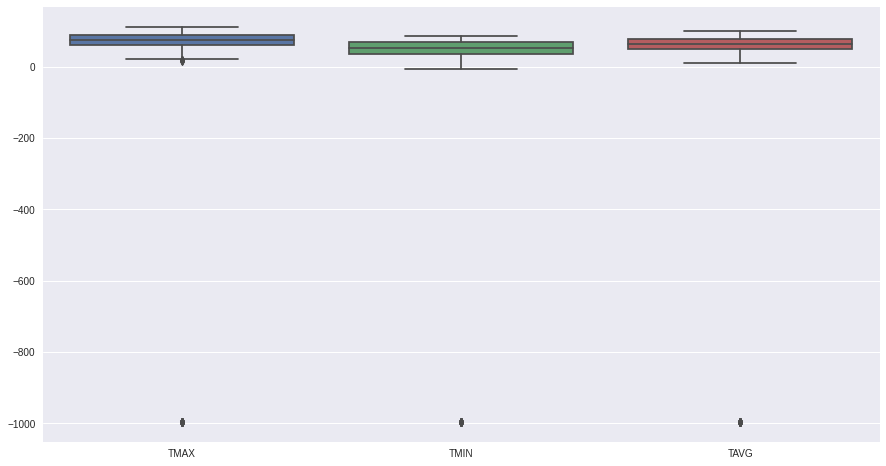

In [33]:
# Inspeção visual para confirmar o fato estranho encontrado acima...
plt.figure(figsize=(15,8))
sns.boxplot(data=weather[temp_cols])
plt.show()

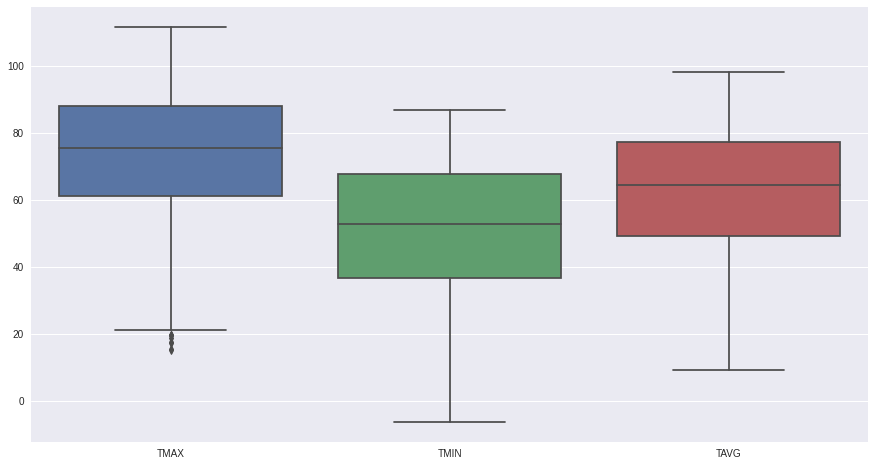

In [34]:
# Removendo os valores outliers estranhos
# Cuidado com a análise! 
# Pode existir temperaturas menores que 0°...

outlier_value = -996
weather = weather[
    (weather["TMAX"] != outlier_value) & 
    (weather["TMIN"] != outlier_value) &
    (weather["TAVG"] != outlier_value)
]

plt.figure(figsize=(15,8))
sns.boxplot(data=weather[temp_cols])
plt.show()

In [35]:
# Amplitude térmica
weather['TDIFF'] = weather.TMAX - weather.TMIN
weather['TDIFF'].describe()

temp_cols.append("TDIFF")

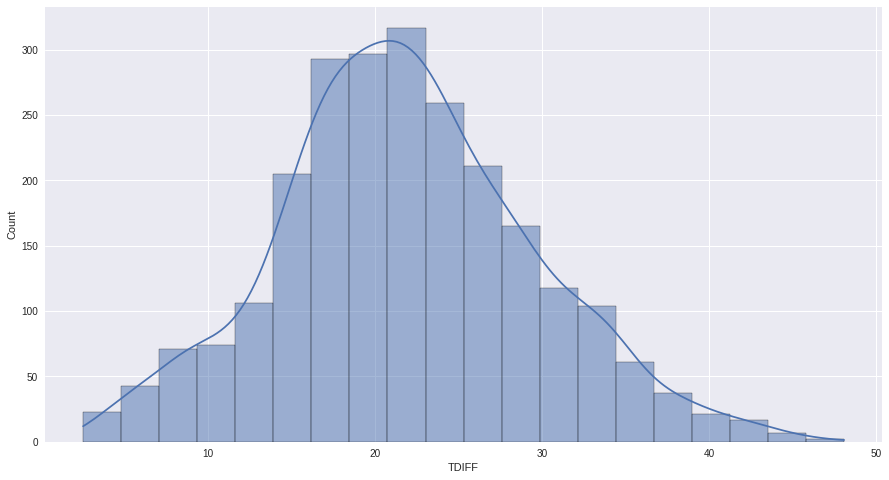

In [36]:
# Distribuição da amplitude térmica
plt.figure(figsize=(15,8))
sns.histplot(x="TDIFF", data=weather, kde=True, bins=20)
plt.show()

## Unindo as duas bases

In [37]:
display(okl.head())
display(weather.head())

,location,subject_age,subject_race,subject_sex,officer_id_hash,violation,citation_issued,outcome,raw_dfnd_race,date_and_time
0,3100 S CLERGEN,28.0,white,male,bcb82f25e8,NO STATE DRIVER LICENSE/IMPROPER USE OR|DRIVIN...,True,citation,W,2011-01-01 01:00:00
1,1430 NW 96,25.0,black,male,242e478482,DESTROYING PROPERTY - PRIVATE OR PUBLIC,True,citation,B,2011-01-01 12:00:00
2,NW 63/LAKEHEFNERPRKWY,26.0,black,male,ec4125b8d5,DISREGARDING A TRAFFIC CONTROL DEVICE,True,citation,B,2011-01-01 15:00:00
3,100 E I240 SERV RD,25.0,white,female,f9a91f8e6a,DISORDERLY CONDUCT,True,citation,W,2011-01-01 15:15:00
4,100 E I240 SRV RD,53.0,white,female,f9a91f8e6a,DISORDERLY CONDUCT,True,citation,W,2011-01-01 15:15:00


,YEAR,MONTH,DAY,STID,TMAX,TMIN,TAVG,DMAX,DMIN,DAVG,...,TR05,R05BD,TR25,R25BD,TR60,R60BD,TR75,R75BD,WIND_CAT,TDIFF
0,2011,1,1,OKCE,35.21,16.02,24.85,13.11,2.95,5.36,...,3.2175,0,3.8503,0,3.8642,0,-999.0,-999.0,Light breeze,19.19
1,2011,1,2,OKCE,43.93,11.62,28.35,17.88,7.29,11.77,...,-996.0000,5,3.8577,0,3.8690,0,-999.0,-999.0,Light breeze,32.31
2,2011,1,3,OKCE,57.79,30.05,40.96,29.65,16.24,21.56,...,3.2648,0,3.8606,0,3.8700,0,-999.0,-999.0,Gentle breeze,27.74
3,2011,1,4,OKCE,48.56,26.05,36.18,25.23,19.33,21.55,...,3.3026,0,3.8601,0,3.8723,0,-999.0,-999.0,Light breeze,22.51
4,2011,1,5,OKCE,52.03,20.87,37.02,27.04,18.61,22.30,...,3.3476,0,3.8560,0,3.8714,0,-999.0,-999.0,Light air,31.16


In [38]:
okl["date"] = okl["date_and_time"].dt.date

weather["date"] = (
    weather["YEAR"].astype(str) + 
    "-" + 
    weather["MONTH"].astype(str).str.zfill(2) + 
    "-" + 
    weather["DAY"].astype(str).str.zfill(2)
)

weather["date"] = pd.to_datetime(weather["date"])
weather["date"] = weather["date"].dt.date

In [39]:
display(okl.shape)
display(weather.shape)

(720502, 11)

(2431, 121)

In [40]:
okl_weather = pd.merge(left=okl, right=weather, on="date", how="left")
okl_weather.shape

(720502, 131)

## Analisando quantidade de paradas policiais de acordo com a categoria dos ventos

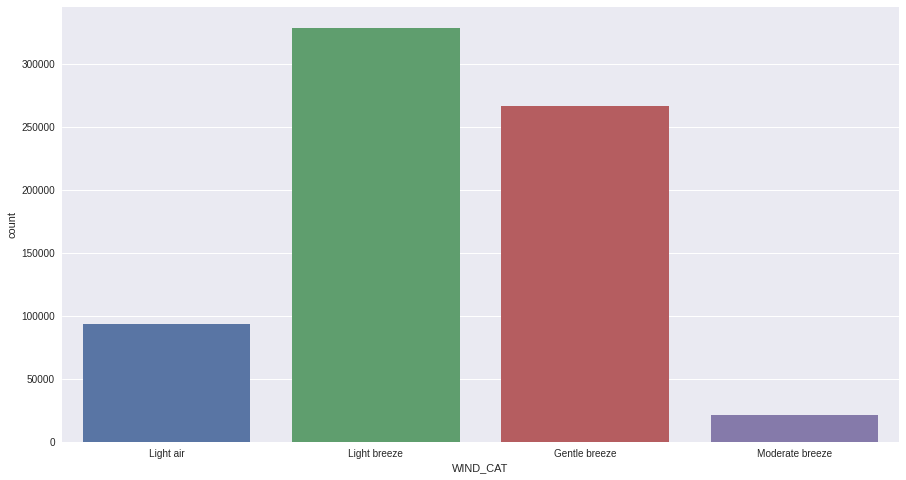

In [41]:
plt.figure(figsize=(15,8))
sns.countplot(data=okl_weather, x="WIND_CAT", order=["Light air", "Light breeze", "Gentle breeze", "Moderate breeze"])
plt.show()

## Analisando relação da violação mais cometida com a temperatura

In [42]:
okl_weather.violation.value_counts()

SPEEDING 1-10 MPH OVER SPEED LIMIT                                                                                    323291
SEAT BELT VIOLATION                                                                                                    34641
SPEEDING 15-19 MPH OVER SPEED LIMIT                                                                                    24873
FAILURE TO STOP FOR STOP SIGN                                                                                          22550
ILLEGAL TAG DISPLAY                                                                                                    15870
                                                                                                                       ...  
PUBLIC DRUNKENNESS|NCRCRA - GLASS BOTTLE VIOLATION|DISORDERLY CONDUCT                                                      1
SEAT BELT VIOLATION|FAILURE TO SHOW PROOF OF INSURANCE|NO STATE DRIVER LICENSE IN POSSESSION|ILLEGAL TAG DISPLAY           1


In [43]:
def fahrenheit_to_celsius(F):
    return 5/9 * (F - 32)

okl_weather["TAVG_C"] = okl_weather.TAVG.apply(fahrenheit_to_celsius)

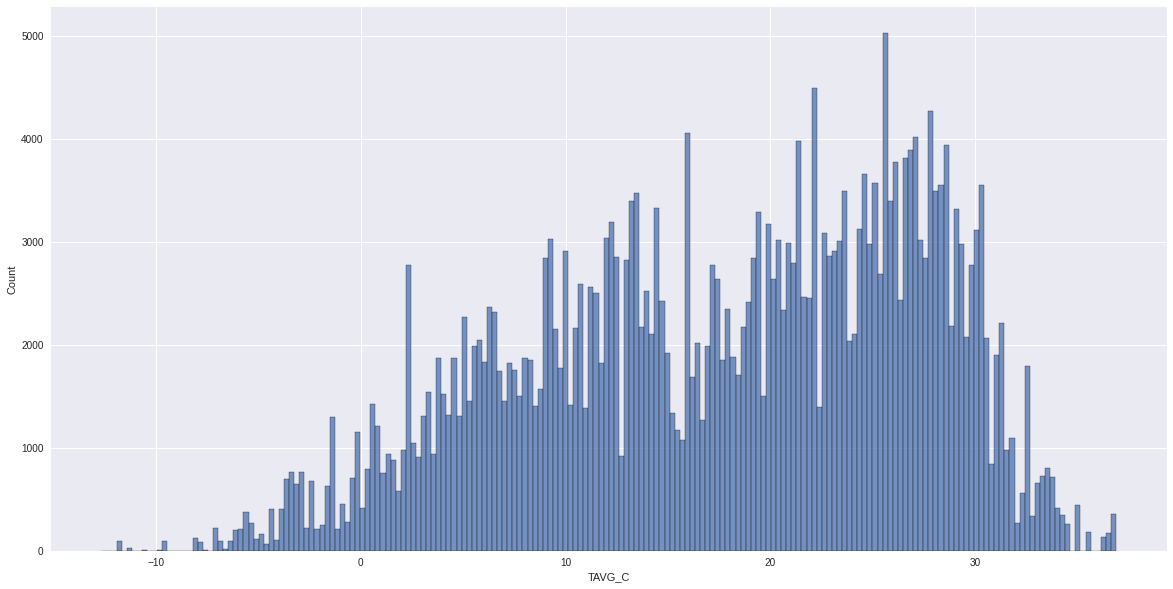

In [44]:
speed_vio = okl_weather[okl_weather.violation == "SPEEDING 1-10 MPH OVER SPEED LIMIT"]

speed_vio.reset_index(inplace=True)
plt.figure(figsize=(20,10))
sns.histplot(data=speed_vio, x="TAVG_C", bins=200)
plt.show()

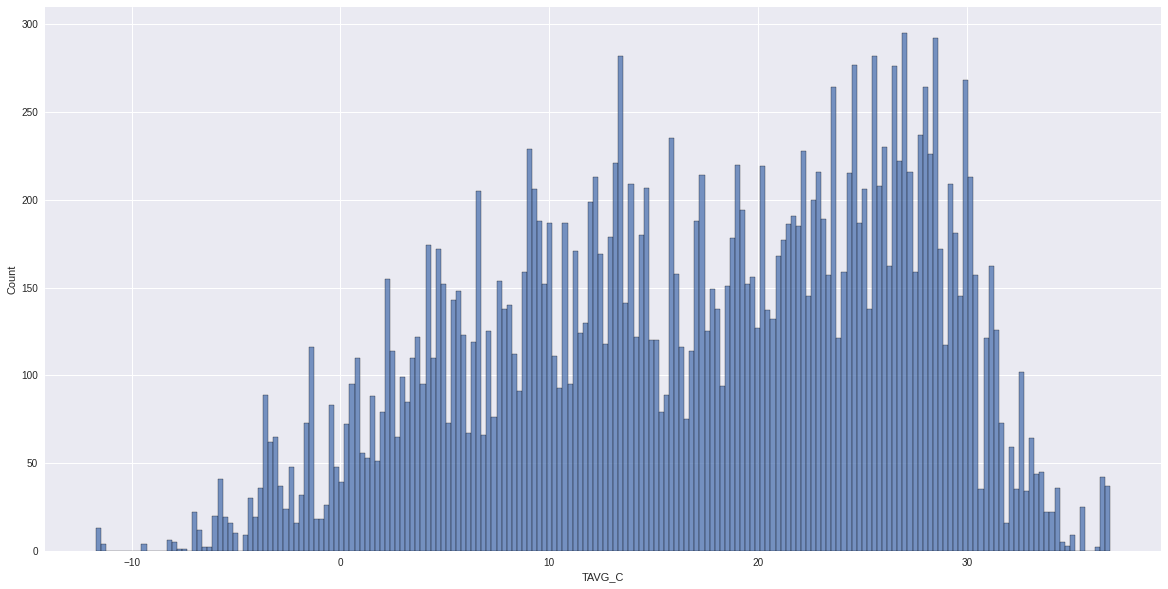

In [45]:
stop_sign_vio = okl_weather[okl_weather.violation == "FAILURE TO STOP FOR STOP SIGN"]

stop_sign_vio.reset_index(inplace=True)
plt.figure(figsize=(20,10))
sns.histplot(data=stop_sign_vio, x="TAVG_C", bins=200)
plt.show()

## Obrigado!

<iframe
  src="https://i.pinimg.com/originals/11/18/b9/1118b9980a49e529b17d4dcbd1c3621d.gif"
  style="width:50%; height:100;"
></iframe>